<a href="https://colab.research.google.com/github/arofenitra/Numerical-Linear-Algebra/blob/main/matrix_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sp

### Matrix addition and multiplication and multiplication by scalar

If $A=(a_{ij})_{n\times n} , B=(a_{ij})_{n\times n} , \lambda \in \mathbb{C}$ then : $A+B=(a_{ij}+b_{ij})_{n\times n}$ , $A \cdot B=\left(\sum_{k=1}^n{a_{ik}b_{kj}} \right)_{n \times n}$ and $\lambda A=(\lambda a_{ij})_{n \times n}$

In [ ]:
#we will take A and B as square matrix
def matrix_addition(A,B): #complexity O(n^2)
  n=len(A)
  if n==len(B):
    return [[A[i][j]+B[i][j] for j in range(n)] for i in range(n)]
  else:
    raise ValueError("matrix with different size cannot be added")

def matrix_multiplication_scalar(A,a): #complexity O(n^2)
  n=len(A)

  return [[a*A[i][j] for j in range(n)] for i in range(n)]

def matrix_multiplication(A,B): #complexity O(n^3)
  n=len(A)
  C=[[0 for _ in range(n)] for _ in range(n)]
  if len(A)!=len(B):
    raise ValueError("matrix with different size cannot be muliplied")
  for i in range(n):
    for j in range(n):
      C[i][j]=sum(A[i][k]*B[k][j] for k in range(n))
  return C

n=3
A=[[1/(i+j+1) for j in range(n)]for i in range(n)] #hilbert matrix
a=2
print("A= ",A)
print("2A= ",matrix_addition(A,A))
print("A^2= ",matrix_multiplication(A,A))

print("with numpy operation :")
A=np.array(A)
print(A+A)
print(A@A) #matrix multiplication with numpy

#plot the time of execution of numpy and the naive addition, multiplication
time_naive=[]
time_numpy=[]
time_naive_mul=[]
time_numpy_mul=[]

n=75
for i in range(n):
  A=sp.linalg.hilbert(i+1)
  A_list=list(A)
  start1=time.time()
  matrix_addition(A_list,A_list)

  time_naive.append(time.time()-start1)

  start2=time.time()
  A+A
  time_numpy.append(time.time()-start2)

  start3=time.time()
  matrix_multiplication(A_list,A_list)
  time_naive_mul.append(time.time()-start3)

  start4=time.time()
  np.dot(A,A)
  time_numpy_mul.append(time.time()-start4)



A=  [[1.0, 0.5, 0.3333333333333333], [0.5, 0.3333333333333333, 0.25], [0.3333333333333333, 0.25, 0.2]]
2A=  [[2.0, 1.0, 0.6666666666666666], [1.0, 0.6666666666666666, 0.5], [0.6666666666666666, 0.5, 0.4]]
A^2=  [[1.3611111111111112, 0.75, 0.525], [0.75, 0.4236111111111111, 0.3], [0.525, 0.3, 0.2136111111111111]]
with numpy operation :
[[2.         1.         0.66666667]
 [1.         0.66666667 0.5       ]
 [0.66666667 0.5        0.4       ]]
[[1.36111111 0.75       0.525     ]
 [0.75       0.42361111 0.3       ]
 [0.525      0.3        0.21361111]]


plotting the result of numpy addition-multiplication vs naive addition-multiplication

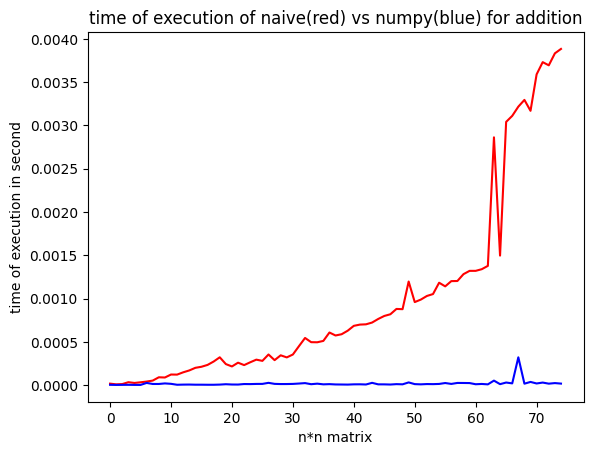

average time of execution of naive addition :  0.0009735774993896484
average time of execution of numpy addition :  1.766522725423177e-05


In [ ]:

plt.plot(time_naive,"-r",label="naive addition")
plt.plot(time_numpy,"-b",label="numpy addition")
plt.title("time of execution of naive(red) vs numpy(blue) for addition")
plt.ylabel("time of execution in second")
plt.xlabel("n*n matrix")


plt.show()
print("average time of execution of naive addition : ",np.sum(time_naive)/n)
print("average time of execution of numpy addition : ",np.sum(time_numpy)/n)

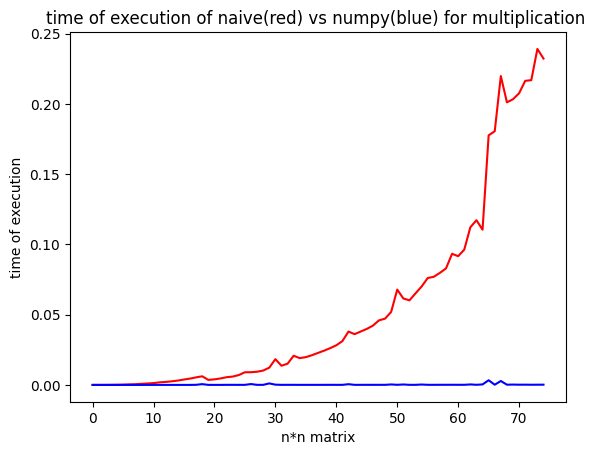

average time of execution of naive multiplication :  0.054292736053466795
average time of execution of numpy multiplication :  0.00019801775614420572


In [ ]:
plt.title("time of execution of naive(red) vs numpy(blue) for multiplication ")
plt.plot(time_naive_mul,"-r",label="naive multiplication")
plt.plot(time_numpy_mul,"-b",label="numpy multiplication")
plt.ylabel("time of execution")
plt.xlabel("n*n matrix")
plt.show()
print("average time of execution of naive multiplication : ",np.sum(time_naive_mul)/n)
print("average time of execution of numpy multiplication : ",np.sum(time_numpy_mul)/n)

### Gaussian elimination, LU Factorization

If we have a $n \cdot n $ matrix $A=(a_{ij})_{n \cdot }$ and a identity matrix $I_n$

$$A|I_n= \left(\begin{matrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\ a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\ a_{31} & a_{32} & a_{33} & \cdots & a_{3n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn}\\   \end{matrix} \right|
\left| \begin{matrix} 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & 0 & \cdots & 0 \\ 0 & 0& 1 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\0 & 0 & 0 & \cdots & 1\\   \end{matrix} \right)$$

For $a_{11}\neq 0$, a pivot element, and $R_1$ the pivot row, we can have : $R_2 \leftarrow R_2 -\frac{a_{21}}{a_{11}}R_1$,...,$R_n \leftarrow R_n -\frac{a_{n1}}{a_{11}}R_1$ where $R_i$ is the ith row.

$$ \left(\begin{matrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\ 0 & a_{22}-a_{21}\frac{a_{12}}{a_{11}} & a_{23}-a_{21}\frac{a_{13}}{a_{11}} & \cdots & a_{2n}-a_{21}\frac{a_{1n}}{a_{11}} \\  0 & a_{32}-a_{31}\frac{a_{12}}{a_{11}} & a_{33}-a_{31}\frac{a_{13}}{a_{11}} & \cdots & a_{3n}-a_{31}\frac{a_{1n}}{a_{11}} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & a_{n2}-a_{n1}\frac{a_{12}}{a_{11}} & a_{n3}-a_{n1}\frac{a_{13}}{a_{11}} & \cdots & a_{nn}-a_{n1}\frac{a_{1n}}{a_{11}}\\   \end{matrix} \right|
\left| \begin{matrix} 1 & 0 & 0 & \cdots & 0 \\ -\frac{a_{12}}{a_{11}} & 1 & 0 & \cdots & 0 \\ -\frac{a_{13}}{a_{11}} & 0& 1 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\-\frac{a_{1n}}{a_{11}} & 0 & 0 & \cdots & 1\\   \end{matrix} \right)$$


If $R_i$ is the row pivot with $a_{jj}\neq 0$, the pivot element, then for $i<j$: the operation $R_i \leftarrow R_i -$ can be expressed as :
$$ E_{ji}A=(a'_{kl})_{n \cdot n}, \; a'_{kl}=a_{kl} \; \forall k\neq j; a'_{jl}=a_{jl}-\frac{a_{ji}}{a_{ii}}a_{il} $$
$\Rightarrow E_{ji}=(a'_{kl}), \; a'_{kk}=1, a'_{ji}=-\frac{a_{ji}}{a_{ii}}$ and otherwise : $a'_{kl}=0$ (its form can be visualise easily similar in form of the RHS of the above matrix).  
Its inverse is $E_{ji}^{-1}=(a'_{kl}), \; a'_{kk}=1, a'_{ji}=\frac{a_{ji}}{a_{ii}}$ and otherwise : $a'_{kl}=0$ .  
Its determinant is 1, $\det(E_{ji})=\det(E_{ji}^{-1})=1$.

$$E_{n,n-1}...E_{n1}...E_{21}A=U ⇒A=\left(\displaystyle \prod_{i=1}^n\prod_{j=i+1}^nE_{ji}^{-1}\right)U=LU $$

In some case where $a_{ii}=0$, then the $LU$ factorization fails. But we can do $PLU$ factorization by permuting it to the other $a_{il}\neq 0$ if such $a_{il}$ exists. Otherwise if such  $a_{il}$ does not exist, the system is singular, not invertible, has determinant 0 and has rank $r<n$.
.


Continuing so on, we can have a triangular matrix. And doing the similar transform but begin from the bottom, we can have the $LU$ decomposition of $A$ for non singular matrix $A$.  
$A=LU$

In [1]:
import numpy as np

In [41]:
def LU_factorization(A):
  n=len(A)
  I=np.eye(n)
  L=np.eye(n)

  for i in range(n):
    if A[i,i]==0:
      raise ValueError("LU factorization failed")

    for j in range(i+1,n):
      A[j,:],I[j,:]=A[j,:]-A[j,i]/A[i,i]*A[i,:],I[j,:]-A[j,i]/A[i,i]*I[i,:] #gaussian elimination
      L[j,i]=-I[j,i] #L is the inverse of I
  return L,A
def PLU_factorization(A):
  n=len(A)
  I=np.eye(n)
  L=np.eye(n)
  P=np.eye(n)
  for i in range(n):
    if A[i,i]!=0:
      for j in range(i+1,n):
        A[j,:],I[j,:]=A[j,:]-A[j,i]/A[i,i]*A[i,:],I[j,:]-A[j,i]/A[i,i]*I[i,:] #gaussian elimination
        L[j,i]=-I[j,i] #L is the inverse of I
    elif A[i,i]==0:
      for j in range(i+1,n):
        if A[j,i]!=0:
          A[j,:],A[i,:]=A[i,:],A[j,:]
          P[j,:],P[i,:]=P[i,:],P[j,:]



  return P,L,A

[[ 1.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [ 2.00000000e+00  3.00000000e+00  4.00000000e+00]
 [-4.00000000e+00  4.44089210e-16  2.85714286e-01]]


In [38]:
L=np.array([[ 1.,  0.,  0.],
       [ 2.,  1.,  0.],
       [-4., -8.,  1.]])
U=np.array([[ 1,  2,  3],
       [ 0, -1, -2],
       [ 0,  0, -3]])
print(np.matmul(L,U))

[[ 1.  2.  3.]
 [ 2.  3.  4.]
 [-4.  0.  1.]]
